In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('vg_sales.csv')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


The output of the first few rows are above. Note that the North American sales for the first four titles greatly outnumbers the Japanese sales. 

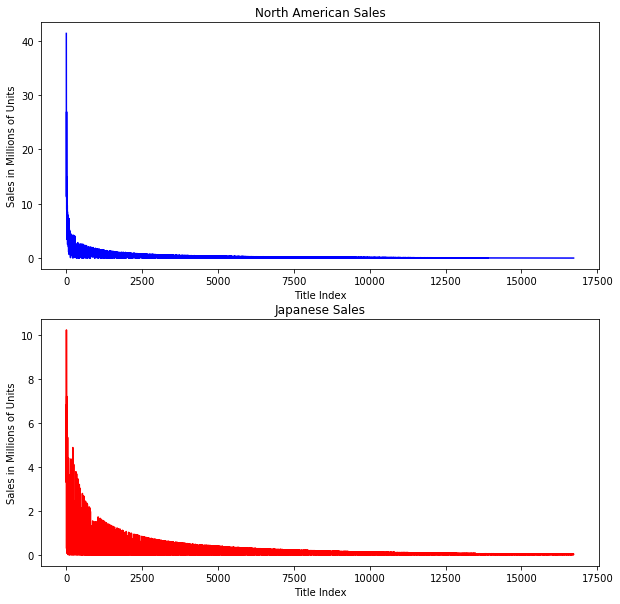

In [26]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(df['NA_Sales'], color = 'Blue')
plt.title('North American Sales')
plt.ylabel('Sales in Millions of Units')
plt.xlabel('Title Index')

plt.subplot(2, 1, 2)
plt.plot(df['JP_Sales'], color = 'red')
plt.title('Japanese Sales')
plt.ylabel('Sales in Millions of Units')
plt.xlabel('Title Index')

plt.show()

From these plots (and the head method called on the data frame), we can see that the data appears to sorted by Sales. 

As noted when looking at the first few rows of the data, the Japanese sales numbers appear to be significantly less than the US sales - at least for the highest selling titles. Wii Sports sold over 40 million in the US, but less than 4 million in Japan. Also note that the sales don't appear to be sorted by the Japanese sales numbers like it appeared for the US sales numbers. Of course, it couldn't be sorted by both unless each title sold the same ratio of US to Japanese numbers. 

In [22]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


If we look at 10 rows instead of 5, it looks like the rows are probably sorted by Global sales as opposed to North American sales like I first thought when looking at the first 5 rows and the North American plot. Of course, we'd have to run some code to verify this. 

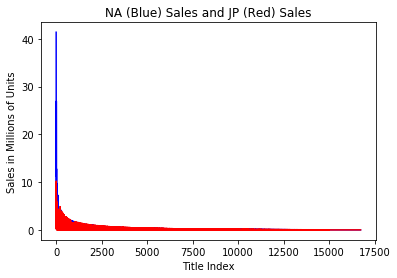

In [20]:
plt.plot(df['NA_Sales'], color = 'Blue')
plt.plot(df['JP_Sales'], color = 'red')
plt.title('NA (Blue) Sales and JP (Red) Sales')
plt.ylabel('Sales in Millions of Units')
plt.xlabel('Title Index')
plt.show()

The plot above compares the sales from North America and Japan. It's a little hard to tell what's going on because of the scale and the overlapping data. But as stated before, the NA sales is a lot higher for the most popular games. 

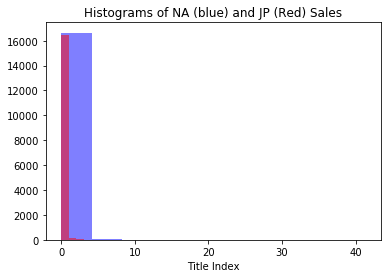

In [21]:
plt.hist(df['NA_Sales'], color = 'Blue', alpha=.5)
plt.hist(df['JP_Sales'], color = 'red', alpha=.5)
plt.title('Histograms of NA (blue) and JP (Red) Sales')
plt.xlabel('Title Index')
plt.show()

Histograms for the data above are not very useful as far as I can tell. 

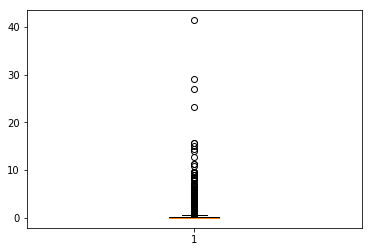

In [23]:
plt.boxplot(df['NA_Sales'])
plt.show()


Similar to the histogram, a boxplot is not very useful for this type of data. 

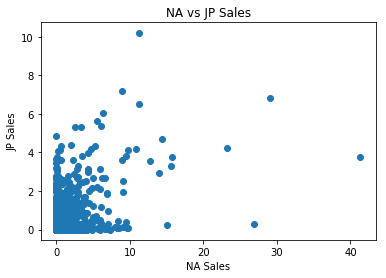

In [24]:
plt.scatter(x = df['NA_Sales'], y = df['JP_Sales'])
plt.title('NA vs JP Sales')
plt.ylabel('JP Sales')
plt.xlabel('NA Sales')
plt.show()

I thought there might be some correspondence between the higher selling games for both regions. My thought would be that data points would not hug the axes for those games, but that does not seem to be the case for at least the two outlier NA games. And there appear to be several games in each market that aren't popular in the other. In retrospect, I guess that makes sense. 

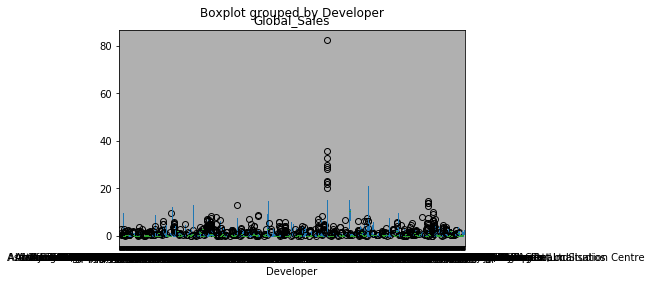

In [25]:
df.boxplot(column='Global_Sales',by='Developer')

I was hoping to see how sales varied by developer, but there are too many developers and too wide a range of global sales to glean much useful information from this boxplot.


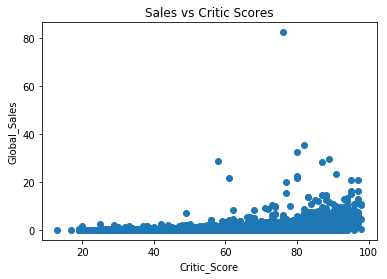

In [27]:
plt.scatter(y = df['Global_Sales'], x = df['Critic_Score'])
plt.title('Sales vs Critic Scores')
plt.xlabel('Critic_Score')
plt.ylabel('Global_Sales')
plt.show()

From this plot, there appears to be a correlation between sales and critic scores. 